<a href="https://colab.research.google.com/github/Enkhamgalan1230/CO599-ML-Group-projects/blob/main/GroupProject_CO559.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a ipynb File for Group project **CO559**

Students in the Group: \

Enkh-Amgalan (Entwan) Enkhbayar (22135347)\
Muneef Mumthas (22206529) \
Crown Caesar (22038807) \
Brunaldo Cimo (22209954) \

In [1]:
# Testing for colab
print("Colab is active and ready.")

print("Welcome to the Python notebook for the Iris dataset analysis.")
print("M the Best")

Colab is active and ready.
Welcome to the Python notebook for the Iris dataset analysis.
M the Best


# **Importing the Libraries**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import essential libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
import tensorflow_hub as hub
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
#Support Vector Machine (SVM) Algorithm
from sklearn import svm
#metrics is for checking the model accuracy
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [4]:
# This cell is specific to Google Colab
from google.colab import drive
drive.mount('/content/drive')
# Mount Google Drive to access the Iris dataset CSV file

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **CSV dataset and it's EDA**


**Importing the Iris Dataset**

In [5]:
# Define the path to the Iris dataset CSV file
path = "/content/drive/MyDrive/Iris.csv"

iris = pd.read_csv(path)
# We removed the column ID since the dataframe is indexed.
#Basically we dont need it
# Also this data is very clean as well as small we dont have to do pre-process the data.
iris.drop('Id', axis=1, inplace=True)

iris.head()
#Sampling the dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.shape
# 150 records and 5 columns

(150, 5)

In [7]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Visual representation for Iris dataset.**

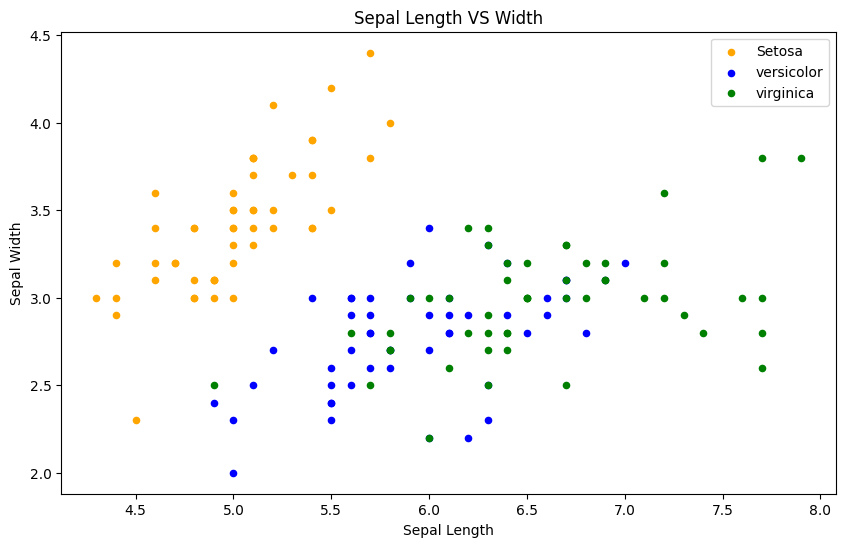

In [9]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
# gcf - get current figure
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

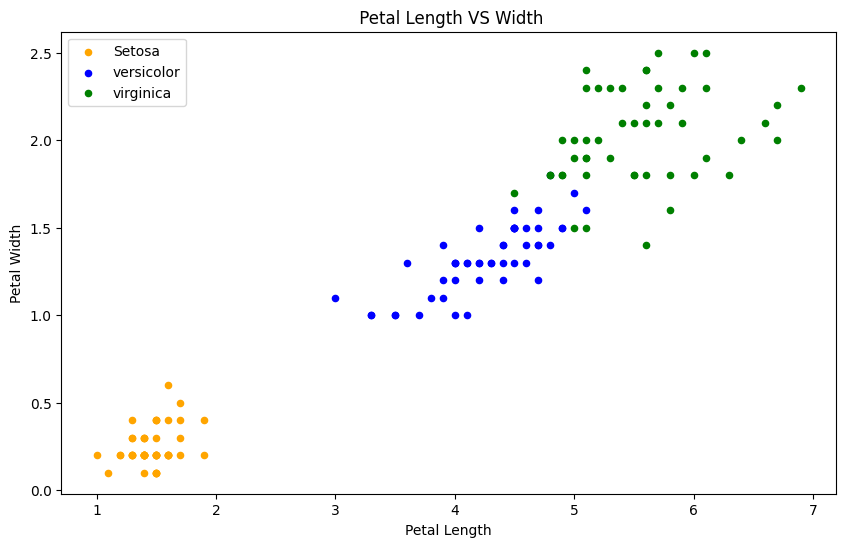

In [10]:
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

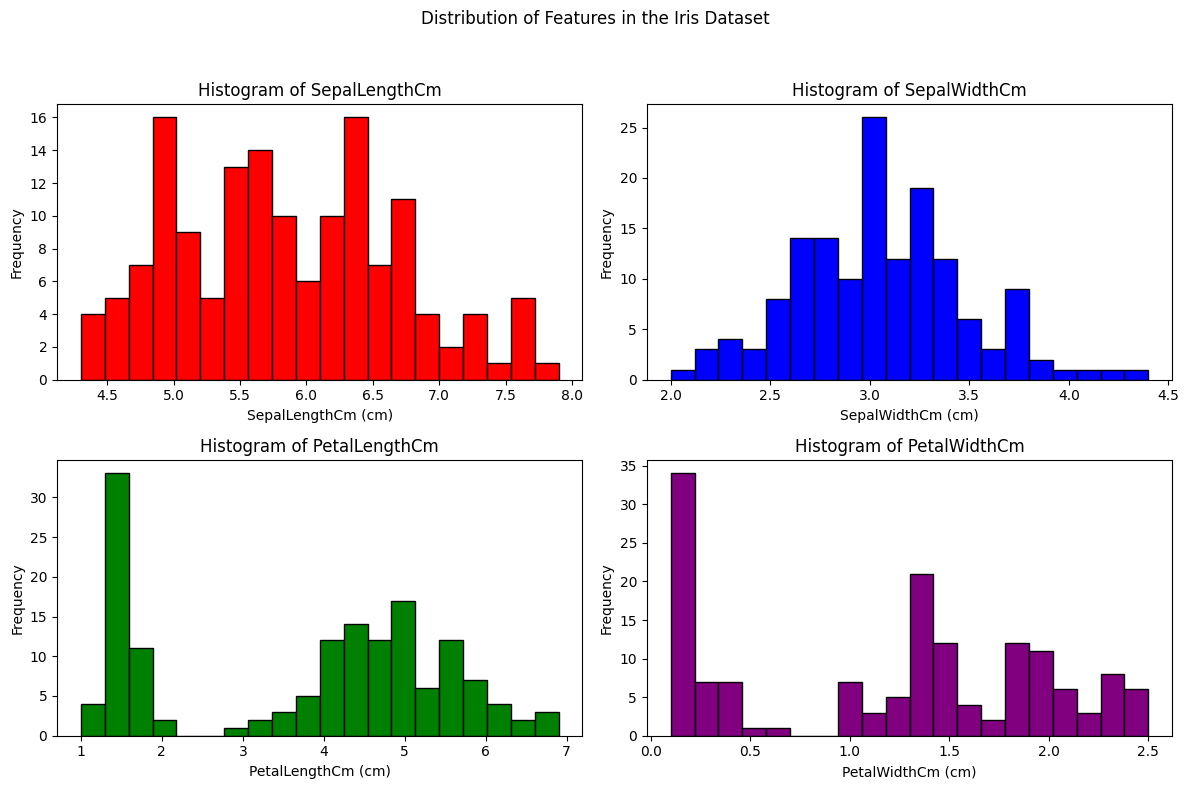

In [11]:
# Define a list of colors for each feature
colors = ['red', 'blue', 'green', 'purple']

# Plot histograms for each feature in the dataset
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Distribution of Features in the Iris Dataset')
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for i, ax in enumerate(axes.flat):
    ax.hist(iris[features[i]], bins=20, color=colors[i], edgecolor='black')
    ax.set_title(f'Histogram of {features[i]}')
    ax.set_xlabel(f'{features[i]} (cm)')
    ax.set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.95])

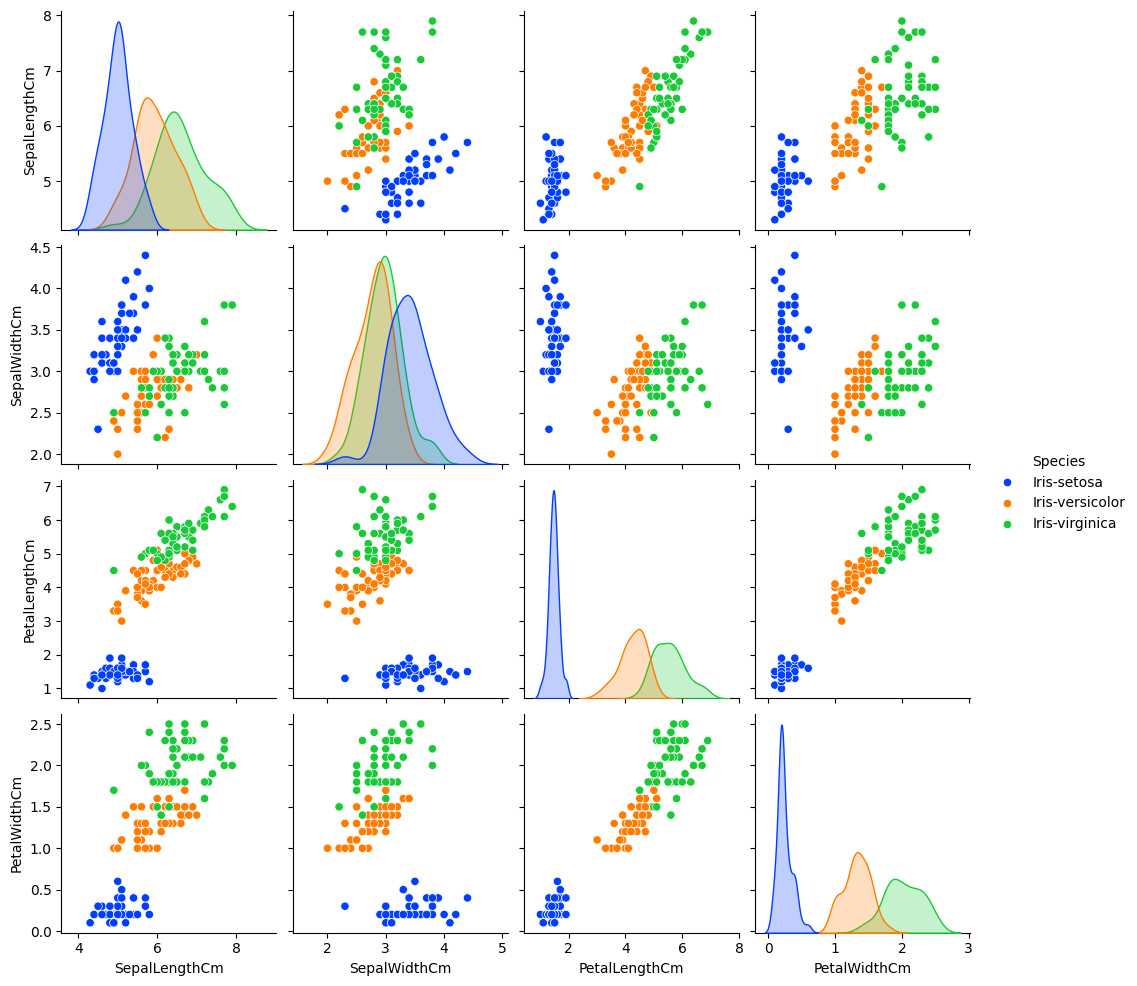

In [12]:
sns.pairplot(iris, hue='Species', palette='bright')

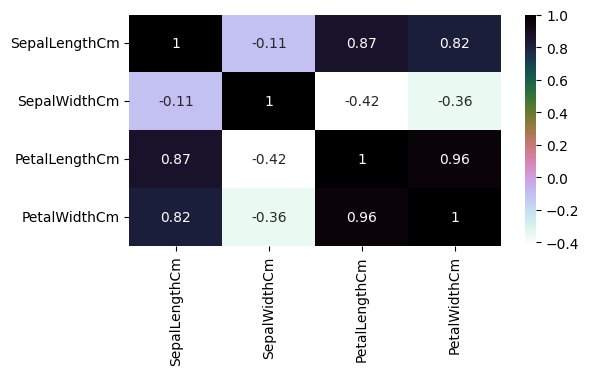

In [13]:
# draws  heatmap with input as the correlation matrix
plt.figure(figsize=(6,3))
sns.heatmap(iris.corr(numeric_only=True), annot=True, cmap='cubehelix_r')
plt.show()

**Note**

For certain datasets like the Iris dataset, which is relatively small and not very complex, finding a split that results in very high accuracies is possible, especially when the training set happens to include a variety of examples that perfectly represent the distribution of the entire dataset.

Setting a random_state there ensures the randomness is consistent across runs, which can lead to consistently replicating exactly the same model each time.

We are facing problem where accuracy percentage was 100 which means overfitting and not really acceptable. When we changed the random state or set it to None, the train-test split and any random processes within the learning algorithms will differ every time we run the code. This can result in:


*   Different subsets of data in the training and testing sets.
*   Slightly different model parameters due to different initialization and training processes.


# **Machine Learning**


### **Splitting data into Training and Testing**

In [14]:
# Split the data into training and testing sets with a test size of 20%
train_X, test_X, train_Y, test_Y = train_test_split(
    iris[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]],
    iris["Species"],
    test_size=0.3,
    random_state = None
)
#output value of test data
# In this one we are taking all features!
# 1. X- Taking the training data features, output of our training data
# 2. Y - Taking test data features, output value of test data
# The dataset will be divided into two sets which are going to bed used for testing as well as training
# 70% - training, 30% - testing

In [15]:
train_X.shape, train_Y.shape

((105, 4), (105,))

In [16]:
test_X.shape, test_Y.shape

((45, 4), (45,))

In [17]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
4,5.0,3.6,1.4,0.2
20,5.4,3.4,1.7,0.2
82,5.8,2.7,3.9,1.2
140,6.7,3.1,5.6,2.4
75,6.6,3.0,4.4,1.4


In [18]:
train_Y.head()

4          Iris-setosa
20         Iris-setosa
82     Iris-versicolor
140     Iris-virginica
75     Iris-versicolor
Name: Species, dtype: object

In [19]:
test_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
47,4.6,3.2,1.4,0.2
136,6.3,3.4,5.6,2.4
125,7.2,3.2,6.0,1.8
38,4.4,3.0,1.3,0.2
131,7.9,3.8,6.4,2.0


In [20]:
test_Y.head()

47        Iris-setosa
136    Iris-virginica
125    Iris-virginica
38        Iris-setosa
131    Iris-virginica
Name: Species, dtype: object

**To compare algorithm's performance on sepal and petal data separately versus combined data, we are splitting the dataset into two parts.**

In [21]:
# Dividing the dataframe into two
petal = iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal = iris[['SepalLengthCm','SepalWidthCm','Species']]

In [22]:

#Petal
train_petal,test_petal = train_test_split(petal,test_size=0.3,random_state=None)
train_x_petal = train_petal[['PetalWidthCm','PetalLengthCm']]
train_y_petal = train_petal.Species
test_x_petal = test_petal[['PetalWidthCm','PetalLengthCm']]
test_y_petal = test_petal.Species

#Sepal
train_sepal,test_sepal = train_test_split(sepal,test_size=0.3,random_state=None)
train_x_sepal = train_sepal[['SepalWidthCm','SepalLengthCm']]
train_y_sepal = train_sepal.Species
test_x_sepal = test_sepal[['SepalWidthCm','SepalLengthCm']]
test_y_sepal = test_sepal.Species

### **Support Vector Machine (SVM)**

Using the  

**Support Vector Classifier (SVC)**

SVC is a specific implementation of the Support Vector Machine algorithm that is designed specifically for classification tasks. In other words, SVC is an SVM used for classification. It seeks to find the hyperplane that best separates the data points into different classes.

The accuracy of the SVC is: 0.977777777778


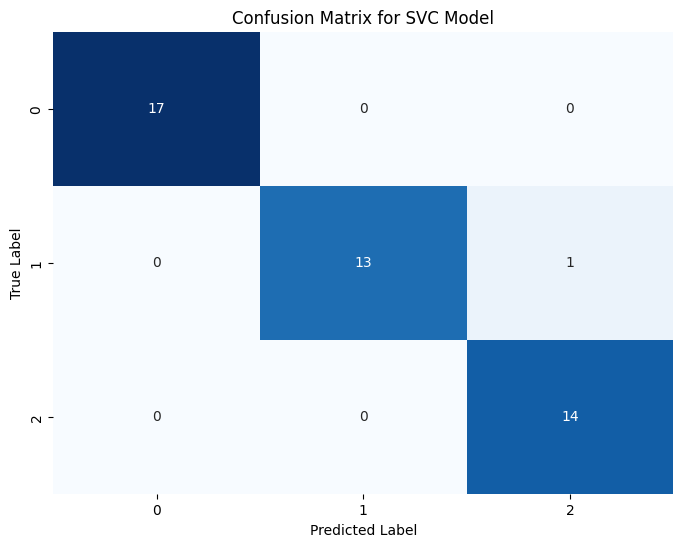

In [23]:
# Initialize and train the SVC model
model = svm.SVC()
model.fit(train_X,train_Y)
prediction1 = model.predict(test_X)
accuracy_svm = accuracy_score(test_Y, prediction1)
print(f'The accuracy of the SVC is: {accuracy_svm:.12f}')

conf_matrix = confusion_matrix(test_Y, prediction1)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for SVC Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**SVC using Petals and Sepals separately:**

In [24]:
#SVC
model=svm.SVC()
model.fit(train_x_petal,train_y_petal)
prediction1=model.predict(test_x_petal)
accuracy_SVM_p = metrics.accuracy_score(test_y_petal, prediction1)
print(f'The accuracy of the SVM using Petals is: {accuracy_SVM_p:.12f}')

model=svm.SVC()
model.fit(train_x_sepal,train_y_sepal)
prediction2=model.predict(test_x_sepal)
accuracy_SVM_s = metrics.accuracy_score(test_y_sepal, prediction2)
print(f'The accuracy of the SVM using Sepals is: {accuracy_SVM_s:.12f}')


conf_matrix_petalSVC = confusion_matrix(test_y_petal, prediction1)
conf_matrix_sepalSVC = confusion_matrix(test_y_sepal, prediction2)
print('\nConfusion Matrix for SVC using petals: \n', conf_matrix_petalSVC)
print('\nConfusion Matrix for SVC using sepals: \n', conf_matrix_sepalSVC)

The accuracy of the SVM using Petals is: 0.933333333333
The accuracy of the SVM using Sepals is: 0.866666666667

Confusion Matrix for SVC using petals: 
 [[18  0  0]
 [ 0 13  1]
 [ 0  2 11]]

Confusion Matrix for SVC using sepals: 
 [[18  0  0]
 [ 0 12  3]
 [ 0  3  9]]


### **Logistic Regression**

**Logistic Regression**

Logistic regression is a supervised machine learning algorithm that accomplishes binary classification tasks by predicting the probability of an outcome, event, or observation. The model delivers a binary or dichotomous outcome limited to two possible outcomes: yes/no, 0/1, or true/false.

The accuracy of the Logistic Regression is: 0.977777777778


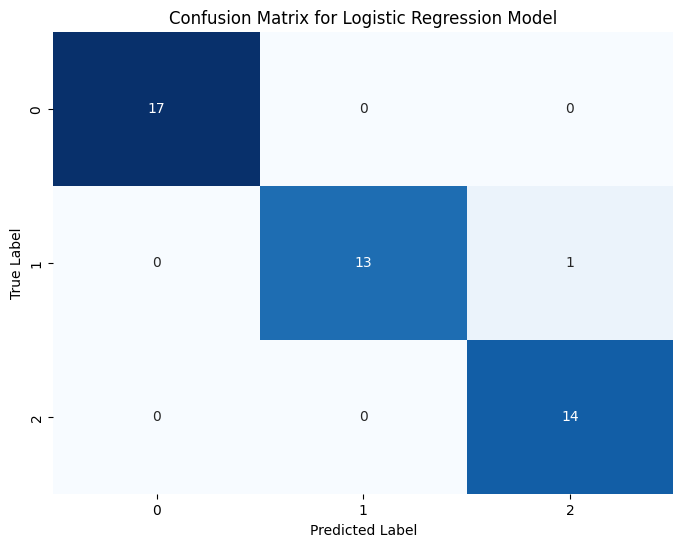

In [25]:
# Logistic Regression Model
model2 = LogisticRegression(max_iter=200) # Increased max_iter for convergence
model2.fit(train_X, train_Y)
prediction2 = model2.predict(test_X) # Corrected to use model2 for prediction
accuracy_LR = accuracy_score(test_Y, prediction2)
print(f'The accuracy of the Logistic Regression is: {accuracy_LR:.12f}')

conf_matrix_LR = confusion_matrix(test_Y, prediction2)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_LR, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Logistic Regression Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Logistic Regression using Petals and Sepals separately:**

In [26]:
#Logistic Regression
model= LogisticRegression()
model.fit(train_x_petal,train_y_petal)
prediction3 = model.predict(test_x_petal)
accuracy_LR_p = metrics.accuracy_score(test_y_petal, prediction3)
print(f'The accuracy of the Logistic Regression using Petals is: {accuracy_LR_p:.12f}')

model= LogisticRegression()
model.fit(train_x_sepal,train_y_sepal)
prediction4 = model.predict(test_x_sepal)
accuracy_LR_s = metrics.accuracy_score(test_y_sepal, prediction4)
print(f'The accuracy of the Logistic Regression using Sepals is: {accuracy_LR_s:.12f}')

conf_matrix_petalLR = confusion_matrix(test_y_petal, prediction3)
conf_matrix_sepalLR = confusion_matrix(test_y_sepal, prediction4)
print('\nConfusion Matrix for Logistic Regression using petals: \n', conf_matrix_petalLR)
print('\nConfusion Matrix for Logistic Regression using sepals: \n', conf_matrix_sepalLR)

The accuracy of the Logistic Regression using Petals is: 0.955555555556
The accuracy of the Logistic Regression using Sepals is: 0.866666666667

Confusion Matrix for Logistic Regression using petals: 
 [[18  0  0]
 [ 0 13  1]
 [ 0  1 12]]

Confusion Matrix for Logistic Regression using sepals: 
 [[18  0  0]
 [ 0 12  3]
 [ 0  3  9]]


### **Decision Tree**

**Decision tree**

Decision trees are an approach used in supervised machine learning, a technique which uses labelled input and output datasets to train models. The approach is used mainly to solve classification problems, which is the use of a model to categorise or classify an object.

The accuracy of the Decision Tree is: 0.911111111111


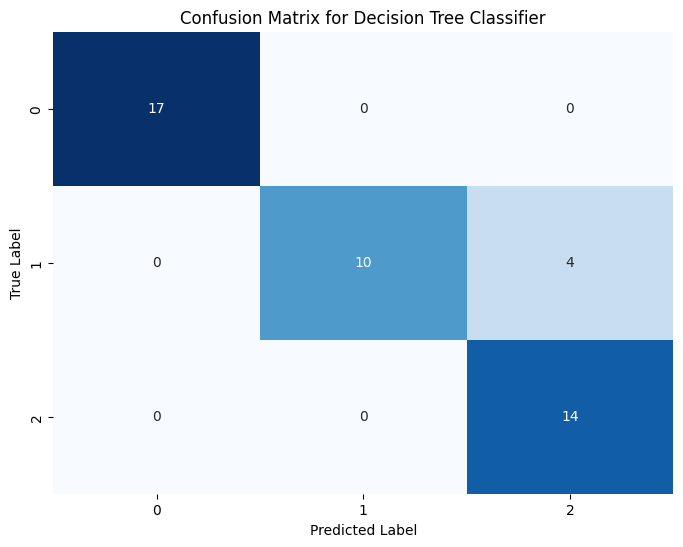

In [27]:
# Decision Tree Classifier
model3 = DecisionTreeClassifier()
model3.fit(train_X, train_Y)
prediction3 = model3.predict(test_X) # Corrected to use model3 for prediction
accuracy_DT = accuracy_score(test_Y, prediction3)
print(f'The accuracy of the Decision Tree is: {accuracy_DT:.12f}')

conf_matrix_dt = confusion_matrix(test_Y, prediction3)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Decision Tree using Petals and Sepals separately:**

In [28]:
# Decision Tree
model= DecisionTreeClassifier()
model.fit(train_x_petal,train_y_petal)
prediction5 =model.predict(test_x_petal)
accuracy_DT_p = metrics.accuracy_score(test_y_petal, prediction5)
print(f'The accuracy of the Decision Tree using Petals is: {accuracy_DT_p:.12f}')

model= DecisionTreeClassifier()
model.fit(train_x_sepal,train_y_sepal)
prediction6 =model.predict(test_x_sepal)
accuracy_DT_s = metrics.accuracy_score(test_y_sepal, prediction6)
print(f'The accuracy of the Decision Tree using Sepals is: {accuracy_DT_s:.12f}')

conf_matrix_petalDT = confusion_matrix(test_y_petal, prediction5)
conf_matrix_sepalDT = confusion_matrix(test_y_sepal, prediction6)
print('\nConfusion Matrix for Decision Tree using petals: \n', conf_matrix_petalDT)
print('\nConfusion Matrix for Decision Tree using sepals: \n', conf_matrix_sepalDT)

The accuracy of the Decision Tree using Petals is: 0.933333333333
The accuracy of the Decision Tree using Sepals is: 0.666666666667

Confusion Matrix for Decision Tree using petals: 
 [[18  0  0]
 [ 0 13  1]
 [ 0  2 11]]

Confusion Matrix for Decision Tree using sepals: 
 [[17  1  0]
 [ 1  8  6]
 [ 0  7  5]]


### **The k-nearest neighbors (KNN)**

**The k-nearest neighbors**

The k-nearest neighbors (KNN) algorithm is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. It is one of the popular and simplest classification and regression classifiers used in machine learning today. Choosing right K value is important so we tested K values from 1 to 40 and compared their error rate to choose the lowest error rated value.


**KNN using all features:**

In [29]:
error_rate = []

# Will take some time
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_X,train_Y)
    pred_i = knn.predict(test_X)
    error_rate.append(np.mean(pred_i != test_Y))

Text(0, 0.5, 'Error Rate')

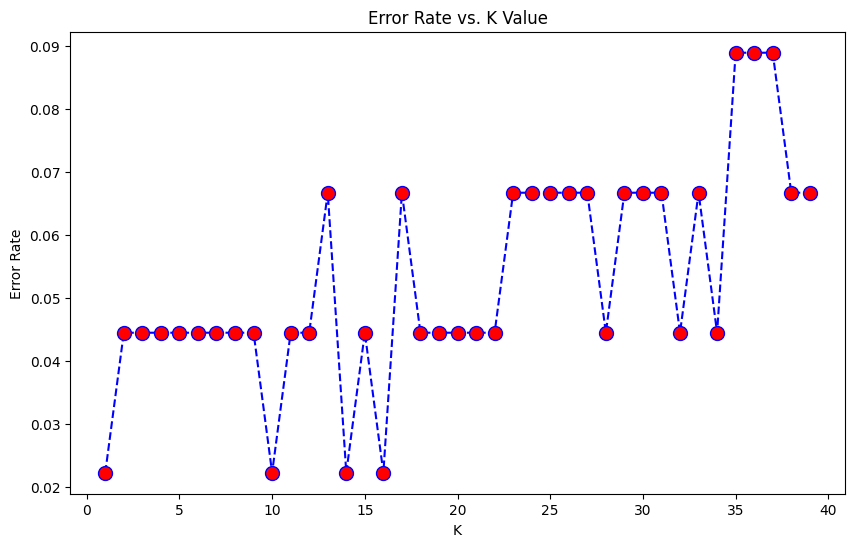

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

The accuracy of the KNN is: 0.955555555556


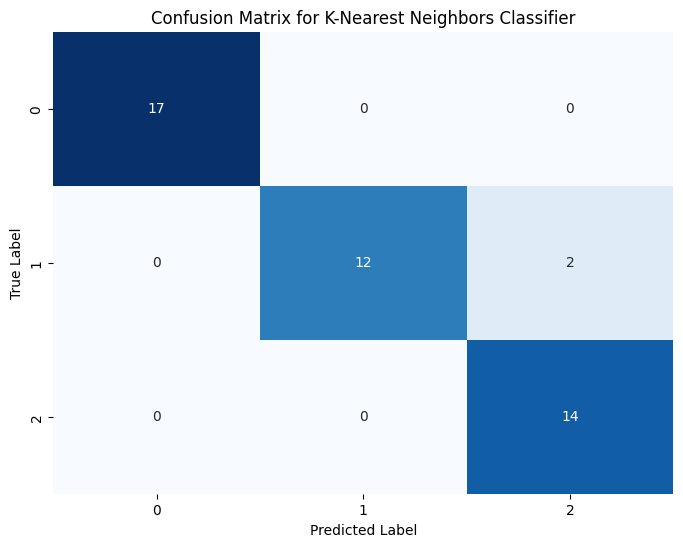

In [31]:
# K-Nearest Neighbors Classifier
model4 = KNeighborsClassifier(n_neighbors=8)
model4.fit(train_X, train_Y)
prediction4 = model4.predict(test_X) # Corrected to use model4 for prediction
accuracy_KNN = accuracy_score(test_Y, prediction4)
print(f'The accuracy of the KNN is: {accuracy_KNN:.12f}')

# Create the confusion matrix
conf_matrix_knn = confusion_matrix(test_Y, prediction4)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for K-Nearest Neighbors Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

These examples above we took all features. So now we can take just sepals and petals.


**KNN using Petals and Sepals separately:**

In [32]:
error_rate = []

# Will take some time
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x_petal,train_y_petal)
    pred_i = knn.predict(test_x_petal)
    error_rate.append(np.mean(pred_i != test_y_petal))

Text(0, 0.5, 'Error Rate')

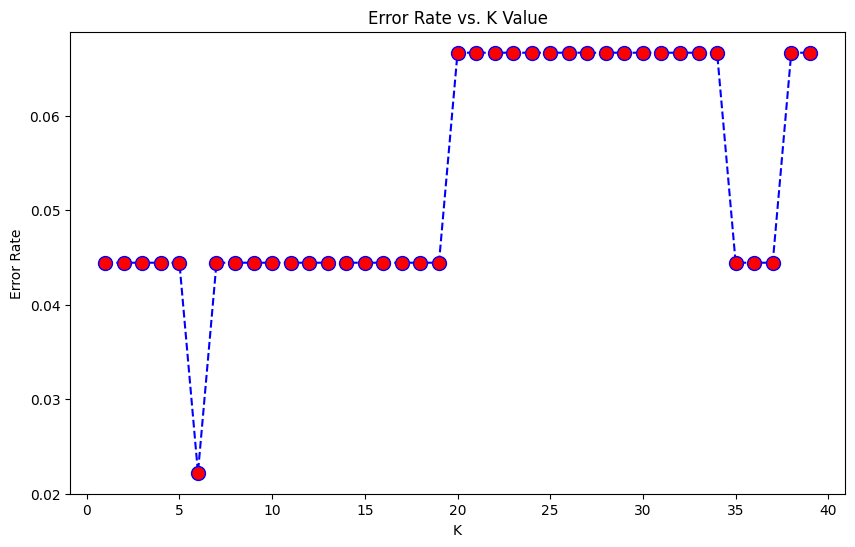

In [33]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [34]:
# k nearest Neighbour
model= KNeighborsClassifier(n_neighbors=8)
model.fit(train_x_petal,train_y_petal)
prediction7=model.predict(test_x_petal)
accuracy_KNN_p = metrics.accuracy_score(test_y_petal, prediction7)
print(f'The accuracy of the k nearest Neighbour using Petals is: {accuracy_KNN_p:.12f}')

model= KNeighborsClassifier(n_neighbors=8)
model.fit(train_x_sepal,train_y_sepal)
prediction8=model.predict(test_x_sepal)
accuracy_KNN_s = metrics.accuracy_score(test_y_sepal, prediction8)
print(f'The accuracy of the k nearest Neighbour using Sepals is: {accuracy_KNN_s:.12f}')

conf_matrix_petalKNN = confusion_matrix(test_y_petal, prediction7)
conf_matrix_sepalKNN = confusion_matrix(test_y_sepal, prediction8)
print('\nConfusion Matrix for k nearest Neighbour using petals: \n', conf_matrix_petalKNN)
print('\nConfusion Matrix for k nearest Neighbour sepals: \n', conf_matrix_sepalKNN)

The accuracy of the k nearest Neighbour using Petals is: 0.955555555556
The accuracy of the k nearest Neighbour using Sepals is: 0.822222222222

Confusion Matrix for k nearest Neighbour using petals: 
 [[18  0  0]
 [ 0 13  1]
 [ 0  1 12]]

Confusion Matrix for k nearest Neighbour sepals: 
 [[18  0  0]
 [ 0 12  3]
 [ 0  5  7]]


# **Image Iris dataset and EDA**


In [35]:
import os
from PIL import Image
import matplotlib.image as img

In [36]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Iris_picture'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Iris_picture/iris-virginica/iris-24cb956e50b7ea4ab5e25eb5450298d37b7b0c49d204279dfdbf9c90c376ddf4.jpg
/content/drive/MyDrive/Iris_picture/iris-virginica/iris-31fe72f1656b49b2079a9f16636ae4b3d77724ae40738f7fd2cf69f11cd0ea18.jpg
/content/drive/MyDrive/Iris_picture/iris-virginica/iris-11fec7884160b8ce5c24faea946e137f8f38eefef4a1b76de6a72e1b0b279c4b.jpg
/content/drive/MyDrive/Iris_picture/iris-virginica/iris-12adb3a8516399e27ff1a9d20d28dca4674836ed00c7c0ae268afce2c30c4451.jpg
/content/drive/MyDrive/Iris_picture/iris-virginica/iris-0e5228449eefd43ae577dabe6fe4a940497234cb468803a1261a261b339715af.jpg
/content/drive/MyDrive/Iris_picture/iris-virginica/iris-0b486eebacd93e114a6ec24264e035684cebe7d2074eb71eb1a71dd70bf61e8f.jpg
/content/drive/MyDrive/Iris_picture/iris-virginica/iris-3b19970f2f6807b8a41c3c426d4b0032fba84d025929eb6e6ff01501995fc1c2.jpg
/content/drive/MyDrive/Iris_picture/iris-virginica/iris-3eed72bc2511f619190ce79d24a0436fef7fcf424e25523cb849642d14ac7bcf.jpg


In [37]:
import pathlib
pic_path = '/content/drive/MyDrive/Iris_picture' # Datasets path
pic_path = pathlib.Path(pic_path)
pic_path

PosixPath('/content/drive/MyDrive/Iris_picture')

In [38]:
setosa = list(pic_path.glob('iris-setosa/*'))
setosa = setosa[: 50] # shorted dataset

versicolour = list(pic_path.glob('iris-versicolour/*'))
versicolour = versicolour[: 50] # shorted dataset

virginica = list(pic_path.glob('iris-virginica/*'))
virginica = virginica[: 50] # shorted dataset


print("Length of setosa: ", len(setosa))
print("Length of versicolour: ", len(versicolour))
print("Length of virginica: ", len(virginica))

Length of setosa:  50
Length of versicolour:  50
Length of virginica:  50


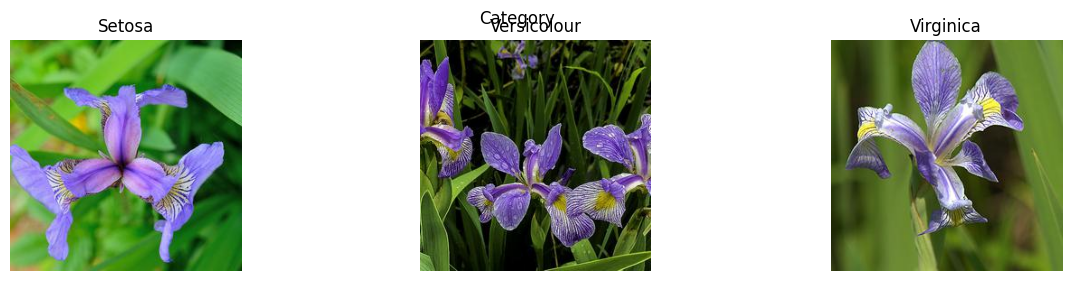

In [39]:
from matplotlib.image import imread

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(15, 3))
fig.suptitle('Category')

def display_random_image(category, axis, title):
    if category:
        random_index = np.random.randint(0, len(category))
        image_path = category[random_index]
        try:
            image = imread(image_path)  # Use imread directly
            axis.imshow(image)
        except FileNotFoundError:
            axis.imshow(np.zeros((10, 10, 3)))  # Display an empty image if the file is not found
            title += " (Missing)"
    else:
        axis.imshow(np.zeros((10, 10, 3)))  # Display an empty image if the category is empty
        title += " (Empty)"

    axis.set_title(title)
    axis.axis('off')  # Hide axes ticks

# Display images
display_random_image(setosa, ax[0], 'Setosa')
display_random_image(versicolour, ax[1], 'Versicolour')
display_random_image(virginica, ax[2], 'Virginica')
plt.show()

# **Deep Learning**

In [40]:
#Defining Dataframe here

#images path
df_images = {
    'setosa' : setosa,
    'versicolour' : versicolour,
    'virginica': virginica
}

#numerical labels for the categories
df_labels = {
    'setosa' : 0,
    'versicolour' : 1,
    'virginica': 2
}

In [41]:
import cv2
rand_virg = np.random.randint(-1, len(virginica))
img = cv2.imread(str(df_images['virginica'][rand_virg])) # Converting it into numerical arrays
img.shape

(256, 256, 3)

In [42]:
X, y = [], [] # X = images, y = labels
for label, images in df_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224, 224)) # Resizing the images to be able to pass on MobileNetv2 model
        X.append(resized_img)
        y.append(df_labels[label])
print(len(X), len(y))

#Runtime - 1m39s

150 150


In [43]:
X = np.array(X)
y = np.array(y)

**Validation set**

The validation set is used during the training phase of the model to provide an unbiased evaluation of the model's performance and to fine-tune the model's parameters. The test set, on the other hand, is used after the model has been fully trained to assess the model's performance on completely unseen data.

In [44]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, train_size = 0.8, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, random_state=42)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((120, 224, 224, 3), (8, 224, 224, 3), (22, 224, 224, 3), (120,), (8,), (22,))

In [74]:
# Converting labels to a categorical format
num_label = len(np.unique(y)) # number of labels

y_train_cat = to_categorical(y_train, num_label)
y_val_cat = to_categorical(y_val, num_label)
y_test_cat = to_categorical(y_test, num_label)

This Rescaling layer normalizes the pixel values of images to the range [0, 1]. This is a common practice as it helps the neural network train faster and more effectively.

In [46]:
normalizer = tf.keras.layers.Rescaling(scale=1/255)

The model uses a URL to load a pre-trained MobileNetV2 model from TensorFlow Hub, which is designed to work with TensorFlow 2.0.
hub.KerasLayer wraps the MobileNetV2 model as a Keras layer and sets trainable=False to freeze the weights of the model during training, meaning the backpropagation won’t alter them. This is useful when using the model as a feature extractor.

In [75]:
mobile_net = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
mobile_net = hub.KerasLayer(
    mobile_net, input_shape=(224,224, 3), trainable=False)

The model is built using the Sequential API, which allows you to stack layers in a linear fashion.

Starts with an input layer specifying the input shape as 224x224 pixels with 3 channels (RGB).

Followed by the rescaling layer.

MobileNetV2 is then added as the feature extractor.

A Dropout layer is included to reduce overfitting by randomly setting a fraction (20% here) of input units to 0 at each update during training.

The final layer is a Dense layer with a softmax activation function, used to classify the images into num_label classes.

In [77]:
from tensorflow.keras.regularizers import l2
model = keras.Sequential([
    keras.Input(shape=(224,224,3)),
    normalizer,
    mobile_net,
    Dropout(0.25),  # Adding dropout; adjust the rate as needed
    Dense(num_label, activation='softmax', kernel_regularizer=l2(0.01))  # Adding L2 regularization
])

Compiles the model with the Adam optimizer and categorical crossentropy as the loss function, suitable for multi-class classification problems.
Metrics are set to 'accuracy' to monitor the classification accuracy.

In [78]:
import tensorflow as tf

learning_rate = tf.Variable(0.001, trainable=False)
learning_rate.assign(0.0001)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=1e-04>

In [67]:
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 5:
        return lr  # Keep the initial learning rate for the first 5 epochs
    else:
        return lr * tf.math.exp(-0.1)  # Decrease the learning rate exponentially after the 5th epoch

lr_scheduler = LearningRateScheduler(scheduler)

In [79]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Monitors the validation loss and will stop the training if it does not improve for 25 epochs, helping prevent overfitting.

In [80]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dropout_2 (Dropout)         (None, 1280)              0         
                                                                 
 dense_4 (Dense)             (None, 3)                 3843      
                                                                 
Total params: 2261827 (8.63 MB)
Trainable params: 3843 (15.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


Model architecture now includes dropout and L2 regularization, which should help in mitigating the overfitting problem. With these updates, we've effectively added a layer that randomly drops out units (50% dropout rate), and we're penalising the complexity of the model through regularizasion in the dense layer.

In [51]:
#early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=25, verbose=1)

Saves the best model based on the validation loss.

In [52]:
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

Trains the model for a maximum of 100 epochs on the training data.

Uses the validation data to evaluate the performance after each epoch.

Employs callbacks for early stopping and model checkpointing to enhance training effectiveness and efficiency.

In [81]:
history = model.fit(X_train, y_train_cat, batch_size=12, epochs=30, validation_data=(X_val, y_val_cat), callbacks=[ mc, lr_scheduler])

Epoch 1/30
10/10 [==============================] - 5s 83ms/step - loss: 1.4704 - accuracy: 0.3000 - val_loss: 1.3588 - val_accuracy: 0.3750 - lr: 0.0010
Epoch 2/30
10/10 [==============================] - 0s 18ms/step - loss: 1.2080 - accuracy: 0.4167 - val_loss: 1.2720 - val_accuracy: 0.3750 - lr: 0.0010
Epoch 3/30
10/10 [==============================] - 0s 19ms/step - loss: 1.0307 - accuracy: 0.5500 - val_loss: 1.1886 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/30
10/10 [==============================] - 0s 20ms/step - loss: 0.9987 - accuracy: 0.5500 - val_loss: 0.9758 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 5/30
10/10 [==============================] - 0s 18ms/step - loss: 0.8873 - accuracy: 0.6250 - val_loss: 1.0470 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 6/30
10/10 [==============================] - 0s 18ms/step - loss: 0.7841 - accuracy: 0.7000 - val_loss: 0.8764 - val_accuracy: 0.7500 - lr: 9.0484e-04
Epoch 7/30
10/10 [==============================] - 0s 19ms/step - loss:

In [82]:
prediction = model.predict(X_test, batch_size=64, verbose=1)
prediction = np.argmax(model.predict(X_test), axis=-1) #for multiclass
prediction = prediction.flatten()
prediction

1/1 [==============================] - 0s 130ms/step


array([2, 1, 1, 2, 1, 0, 0, 0, 0, 2, 2, 0, 2, 2, 1, 0, 0, 2, 0, 0, 1, 0])

In [83]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.7272727272727273


In [84]:
model.evaluate(X_test,y_test_cat)

1/1 [==============================] - 0s 52ms/step - loss: 0.7861 - accuracy: 0.7273


[0.7861070036888123, 0.7272727489471436]

In [85]:
confusion_matrix(y_test, prediction)

array([[7, 1, 1],
       [2, 3, 0],
       [1, 1, 6]])

In [86]:
df = pd.DataFrame({'actual': y_test, 'predicted': prediction})
df

,actual,predicted
0,0,2
1,1,1
2,1,1
3,2,2
4,0,1
5,0,0
6,0,0
7,0,0
8,0,0
9,2,2


# **Conclusion**

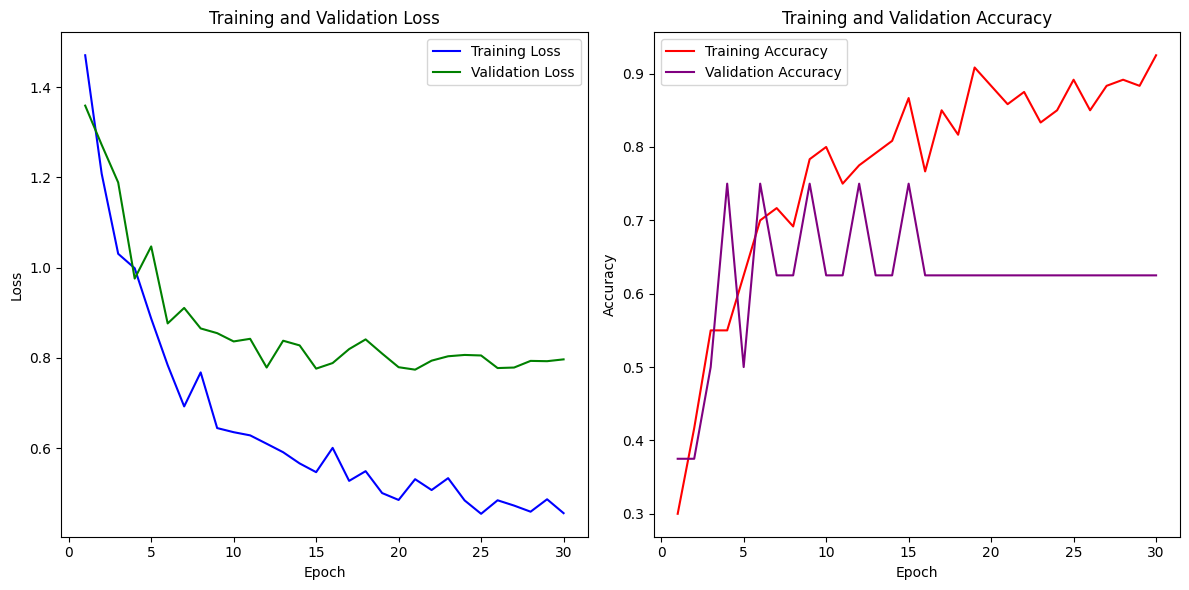

In [87]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

# Plotting both loss and accuracy in one figure
plt.figure(figsize=(12, 6))

# First subplot for loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training Loss', color='blue')
plt.plot(epochs, val_loss, label='Validation Loss', color='green')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Second subplot for accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, label='Training Accuracy', color='red')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='purple')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [88]:
# Expanded accuracy data
expanded_data = {
    'Feature Set': ['Petals', 'Sepals', 'Petals', 'Sepals', 'Petals', 'Sepals', 'Petals', 'Sepals',
                    'All Features', 'All Features', 'All Features', 'All Features'],
    'Model': ['SVM', 'SVM', 'Logistic Regression', 'Logistic Regression', 'Decision Tree', 'Decision Tree',
              'K Nearest Neighbour', 'K Nearest Neighbour', 'SVM', 'Logistic Regression',
              'Decision Tree', 'K Nearest Neighbour'],
    'Accuracy_ML': [
        accuracy_SVM_p, accuracy_SVM_s, accuracy_LR_p, accuracy_LR_s,
        accuracy_DT_p, accuracy_DT_s, accuracy_KNN_p, accuracy_KNN_s,
        accuracy_svm, accuracy_LR, accuracy_DT, accuracy_KNN
    ]
}

# Convert the expanded dataset to DataFrame
expanded_accuracy_df = pd.DataFrame(expanded_data)

In [89]:
print(expanded_accuracy_df)

     Feature Set                Model  Accuracy_ML
0         Petals                  SVM     0.933333
1         Sepals                  SVM     0.866667
2         Petals  Logistic Regression     0.955556
3         Sepals  Logistic Regression     0.866667
4         Petals        Decision Tree     0.933333
5         Sepals        Decision Tree     0.666667
6         Petals  K Nearest Neighbour     0.955556
7         Sepals  K Nearest Neighbour     0.822222
8   All Features                  SVM     0.977778
9   All Features  Logistic Regression     0.977778
10  All Features        Decision Tree     0.911111
11  All Features  K Nearest Neighbour     0.955556


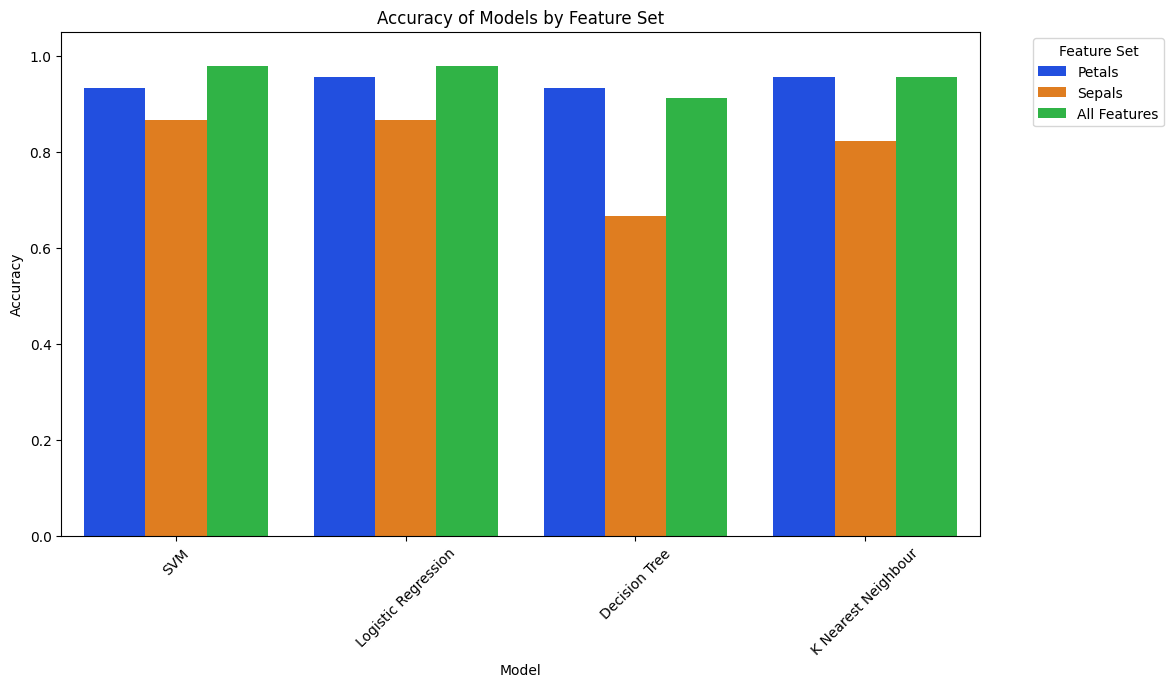

In [90]:
plt.figure(figsize=(10, 6))
sns.barplot(y='Accuracy_ML', x='Model', hue='Feature Set', data=expanded_accuracy_df, palette='bright')  # Using 'bright' palette
plt.title('Accuracy of Models by Feature Set')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1.05)  # Adjusted for vertical orientation
plt.tight_layout()
plt.legend(title='Feature Set', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)
plt.show()
